# Customer churn prediction Part II

**Purpose**: To predict customer churn by using <br>
(i) optimisation algorithm (**Genetic Algorithm**) for feature selection AND  <br>
(ii) supervised learning algorithm (**Decision Trees**)  <br>
**Date**: 26 February 2022 <br>

**Contents**

- [1 Global environment](#env)
- [2 Import packages](#import)
- [3 Read data](#read)
- [4 Evaluation of the Decision Trees models (with feature selection)](#eval_DT_no_FS)
- [5 Computing cross-validated metrics](#cv)

In [1]:
# autosave every 60 seconds
%autosave 60

Autosaving every 60 seconds


<a name='env'></a>
# 1 Global environment

In [2]:
# check the python version on Anaconda 
! python --version

Python 3.7.11


<a name='import'></a>
# 2 Import packages

In [3]:
from genetic_selection import GeneticSelectionCV
import numpy as np # linear algebra
import pandas as pd # data processing
from math import * # module math
import matplotlib # visualization
import matplotlib.pyplot as plt 
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None) # set the max number of column width to be shown
pd.set_option("max_colwidth", None) # set the max value of column width to be shown
pd.set_option("max_rows", 200) # set the max number of rows to be shown
matplotlib.rcParams['font.size'] = 20.0 # set the font size in the label 

<a name="read"></a>
# 3 Read data

In [4]:
# read the imputed data from part I Jupyter notebook.
df_imputed = pd.read_csv('df_imputed.csv')

In [5]:
df_imputed

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,ServiceArea_frequency,ChildrenInHH_frequency,HandsetRefurbished_frequency,HandsetWebCapable_frequency,TruckOwner_frequency,RVOwner_frequency,Homeownership_frequency,BuysViaMailOrder_frequency,RespondsToMailOffers_frequency,OptOutMailings_frequency,NonUSTravel_frequency,OwnsComputer_frequency,HasCreditCard_frequency,NewCellphoneUser_frequency,NotNewCellphoneUser_frequency,OwnsMotorcycle_frequency,MadeCallToRetentionTeam_frequency,CreditRating_frequency,PrizmCode_frequency,Occupation_frequency,MaritalStatus_frequency,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,20.0,11.3,0.0,136.3,24.3,7.0,158.0,94.7,11.3,0.0,2.3,20.0,1.0,1.0,4.0,1.0,298.0,58.0,58.0,0.0,0.0,0.0,8.0,0.0,150.000000,0.018190,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.483229,0.744514,0.600304,1
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,3.7,0.0,0.0,23.1,6.0,2.3,31.3,21.3,0.7,0.0,0.0,22.0,1.0,1.0,2.0,1.0,659.0,28.0,0.0,0.0,0.0,0.0,7.0,0.0,80.000000,0.001411,0.761129,0.864263,0.9,0.187931,0.082445,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.399696,0
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,62.0,7.3,0.0,198.5,36.0,10.0,113.7,118.3,11.0,0.0,3.3,7.0,1.0,1.0,2.0,1.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.000000,0.004548,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.801254,0.863009,0.986207,0.965831,0.134013,0.322257,0.744514,0.390584,0
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,10.0,0.0,0.0,127.5,32.7,30.0,90.7,95.7,5.0,0.0,0.7,22.0,4.0,4.0,2.0,2.0,11.0,52.0,50.0,0.0,0.0,0.0,8.0,0.0,150.000000,0.007370,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.150313,0.744514,0.600304,0
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,49.7,22.0,0.0,134.8,218.7,9.0,214.7,204.7,25.3,0.0,2.3,18.0,2.0,2.0,2.0,2.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,0.029951,0.761129,0.135737,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.326959,0.198746,0.863009,0.986207,0.965831,0.134013,0.483229,0.744514,0.365529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,30.48,242.0,40.0,0.50,0.0,0.0,-9.0,0.5,6.0,9.7,70.0,1.7,0.3,12.8,27.7,0.7,59.0,50.0,15.7,0.0,0.0,9.0,1.0,1.0,1.0,1.0,264.0,50.0,50.0,0.0,0.0,1.0,6.0,0.0,85.449608,0.002195,0.238871,0.864263,0.9,0.812069,0.917555,1.0,0.35768,0.374608,0.984796,0.944357,0.184483,0.673041,0.801254,0.863009,0.986207,0.965831,0.038401,0.150313,0.166301,0.600304,0
6376,66.17,559.0,45.0,0.00,80.0,0.6,548.0,59.3,3.0,1.3,20.0,0.0,0.0,26.8,6.7,3.3,50.3,33.7,4.3,0.0,0.0,17.0,2.0,2.0,1.0,1.0,504.0,60.0,54.0,0.0,0.0,0.0,7.0,0.0,56.818354,0.009409,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.625392,0.984796,0.944357,0.815517,0.673041,0.801254,0.863009,0.986207,0.965831,0.361912,0.322257,0.744514,0.600304,0
6377,99.61,1147.0,60.0,1.73,101.0,0.0,-414.0,-29.6,19.0,1.3,36.7,2.3,0.0,211.4,80.0,2.7,263.0,156.7,20.3,0.0,8.0,14.0,1.0,1.0,3.0,3.0,27.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,100.000000,0.010663,0.761129,0.864263,0.9,0.812069,0.917555,1.0,0.64232,0.

In [6]:
# read the selected features from part I Jupyter notebook.
with open("features_selected_new.txt", "r") as file:
    features_selected = file.read().splitlines()
    print(features_selected)

['MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'PercChangeMinutes', 'MonthsInService', 'UniqueSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'ReferralsMadeBySubscriber', 'HandsetRefurbished_frequency', 'Homeownership_frequency', 'OwnsComputer_frequency', 'HasCreditCard_frequency', 'NotNewCellphoneUser_frequency', 'MadeCallToRetentionTeam_frequency', 'Occupation_frequency']


In [7]:
features_selected

['MonthlyMinutes',
 'TotalRecurringCharge',
 'OverageMinutes',
 'PercChangeMinutes',
 'MonthsInService',
 'UniqueSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'RetentionCalls',
 'ReferralsMadeBySubscriber',
 'HandsetRefurbished_frequency',
 'Homeownership_frequency',
 'OwnsComputer_frequency',
 'HasCreditCard_frequency',
 'NotNewCellphoneUser_frequency',
 'MadeCallToRetentionTeam_frequency',
 'Occupation_frequency']

In [8]:
# check the type of features_selected
type(features_selected)

list

<a name="eval_DT_no_FS"></a>
# 4 Evaluation of the Decision Trees models (with feature selection)

In [9]:
def prediction(algorithm, training_x, testing_x, training_y, testing_y):
    """
    Takes in algorithm, fits it with training_x, training_y,
    calculate the predictions
    """ 
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, matthews_corrcoef
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

# define the features used i.e. X and the target
cols = features_selected
X = df_imputed[cols]
target = df_imputed["Churn"]

# split the dataset to train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = .25, random_state = 111)

In [11]:
def treeplot(classifier, cols, classnames):
    """
    Takes in classifier, cols, classnames
    Plots the decision tree
    """ 
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True)
                  )
    display(graph)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82      1160
           1       0.43      0.16      0.24       435

    accuracy                           0.71      1595
   macro avg       0.59      0.54      0.53      1595
weighted avg       0.66      0.71      0.66      1595

Accuracy Score: 0.7122257053291536


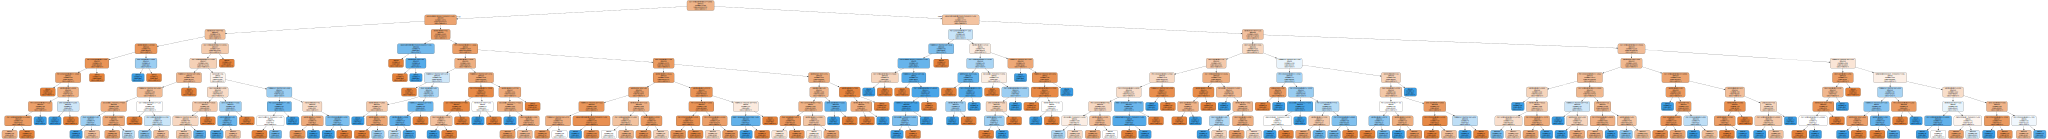

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display

# define the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

# calculate the prediction
prediction(decision_tree, x_train, x_test, y_train, y_test)

# plot the decision tree
treeplot(decision_tree, cols, ["Not churn", "Churn"])

## Model performances over the testing dataset

In [13]:
# put the model name, model class and used columns in a dictionary
models = {'With feature selection': [decision_tree, cols]}

## Model performance metrics

In [14]:
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    """
    Takes in model, training_x, testing_x, training_y, testing_y, name
    Puts model report in a dataframe
    """ 
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    mcc_metric = matthews_corrcoef(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "F1-score"        : [f1score],
                       "ROC_AUC"         : [roc_auc],
                       "MCC_metric"    : [mcc_metric],
                      })
    return df

In [15]:
# calculate the model performance on the test dataset
model_performances_train = pd.DataFrame() 
for name in models:
    model_performances_train = model_performances_train.append(model_report(models[name][0], x_train[models[name][1]], 
                                                                                x_test[models[name][1]], 
                                                                                y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
# plot the report table
py.iplot(table_train)

<a name='cv'></a>
# 5 Computing cross-validated metrics

**cross_val_score** can be used to estimate model's accuracy in a more robust way than with just the traditional train-test split. 
All the data should be fed inside it, and it will make the necessary train-test splits.

## cross-validated metrics for model without feature selection

In [16]:
from sklearn.model_selection import cross_val_score
# define the decision tree classifier
clf = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

In [19]:
# define the X and y
y = df_imputed["Churn"]
X =  df_imputed.loc[:,  df_imputed.columns != 'Churn']
# calculate the cross validation score using F-1 score as metric
scores = cross_val_score(clf, X, y, cv=10, scoring='f1')
mean_scores = np.mean(scores)
print("Average F1-score of 10-fold cross validation = "+"{:.3f}".format(mean_scores))

Average F1-score of 10-fold cross validation = 0.237


## cross-validated metrics for model with feature selection

In [20]:
# define the X and y
y = df_imputed["Churn"]
X =  df_imputed[cols]
# calculate the cross validation score using F-1 score as metric
scores = cross_val_score(clf, X, y, cv=10, scoring='f1')
mean_scores = np.mean(scores)
print("Average F1-score of 10-fold cross validation = "+"{:.3f}".format(mean_scores))

Average F1-score of 10-fold cross validation = 0.239


# End